In [1]:
import numpy as np
import det_prob_plot as det
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

c:\Users\bryce\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


species v0.8.3

Working folder: c:\Users\bryce\High_Contrast_Imaging

Configuration file: c:\Users\bryce\High_Contrast_Imaging\species_config.ini
Database file: c:\Users\bryce\High_Contrast_Imaging\species_database.hdf5
Data folder: c:\Users\bryce\High_Contrast_Imaging\data

Configuration settings:
   - Database: c:\Users\bryce\High_Contrast_Imaging\species_database.hdf5
   - Data folder: c:\Users\bryce\High_Contrast_Imaging\data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py installed
Process number 1 out of 1...


In [7]:
model = 'atmo'
model_tag = 'atmo-ceq'
foldername = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2023/exeter/fits'
file_list = ['cc_adi_bckg1_mag7_M_CVC_exeter_all_effects.fits',
             'cc_adi_bckg1_mag7.5_M_CVC_exeter_all_effects.fits',
             'cc_adi_bckg1_mag8_M_CVC_exeter_all_effects.fits'
             ]
file_mag_list = [7,7.5,8]
stellar_mag_list = [8.304,
7.039,
7.418,
8.026,
7.468,
7.636,
7.317,
7.360,
7.548,
7.887
]
star_list = ['HIP75659',
'HIP76782',
'HIP77347',
'HIP77736',
'HIP77960',
'HIP78581',
'HIP79250',
'HIP79690',
'HIP80896',
'HIP82218'
]
filter_name_list = ['MKO_Mp']*10
band_list = ['M']*10
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/sco_cen/USC_M'
distance = [122.5,
87.6,
123.3,
108.1,
121.4,
105.3,
120.9,
112.9,
118.2,
118.2
]
age = [11]*10

Unpacking ATMO isochrones (9.6 MB)... [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO non-equilibrium chemistry (weak)... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO non-equilibrium chemistry (strong)... [DONE]
Database tag: atmo-neq-strong
The 'MKO_Mp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
M-Band Detection Probability for HIP75659, a 11 Myrs, 8.304 Mag Star at 122.5 pc time elapsed - 00:00:01.47
The 'MKO_Mp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
M-Band Detection Probability for HIP76782, a 11 Myrs, 7.039 Mag Star at 87.6 pc time elapsed - 00:00:01.55
The 'MKO_Mp' filter is found in the list of available

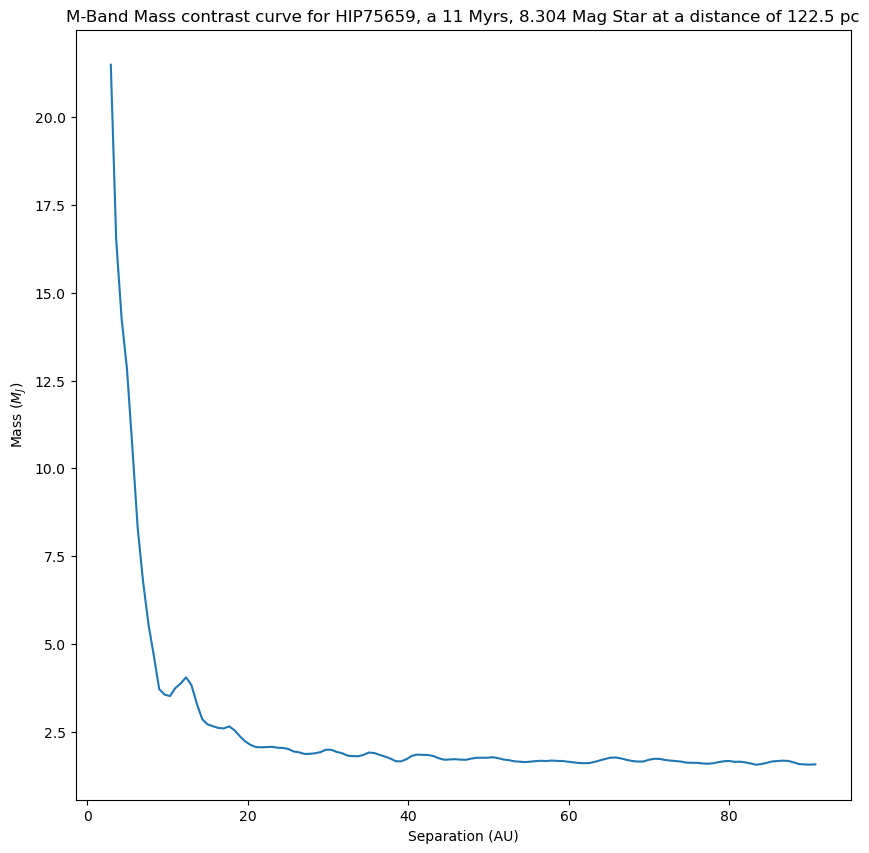

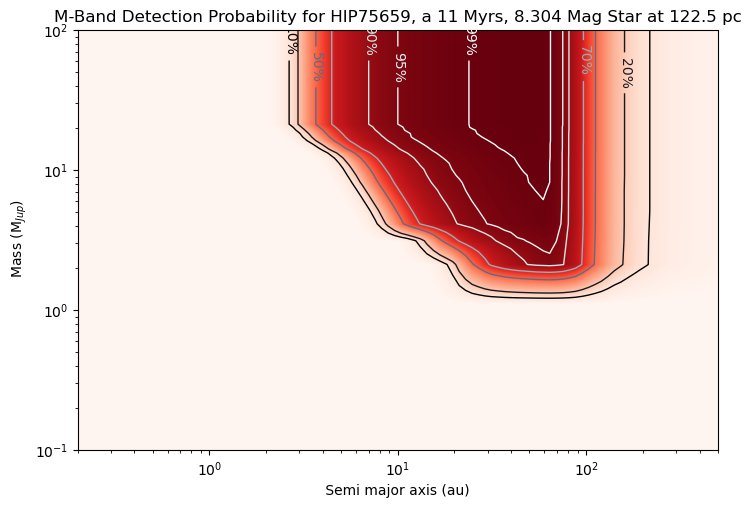

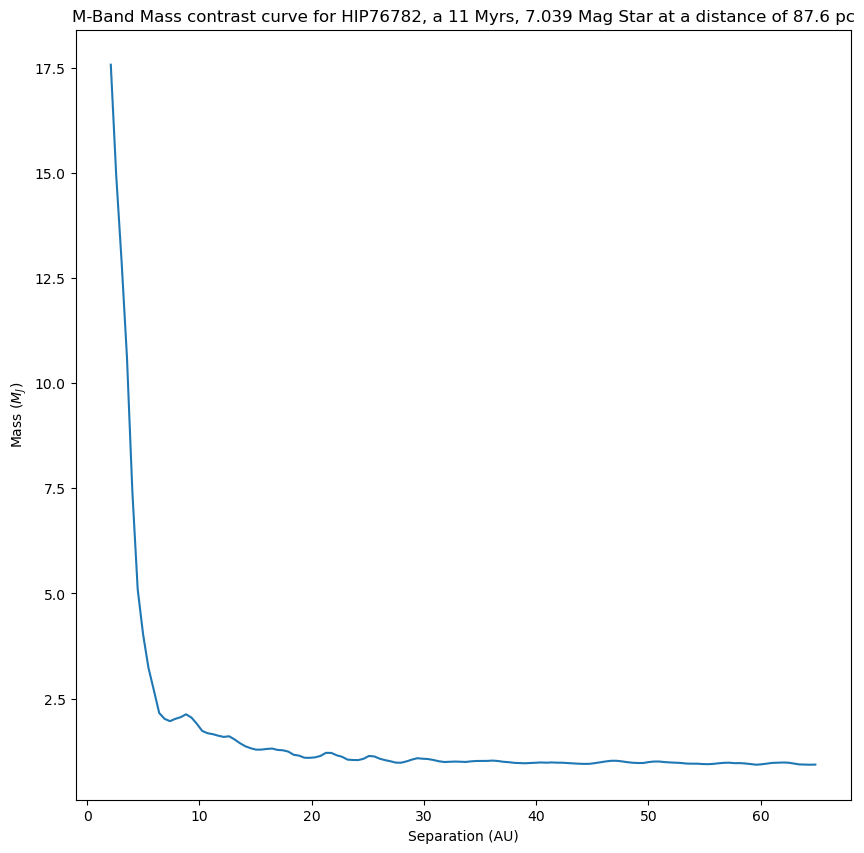

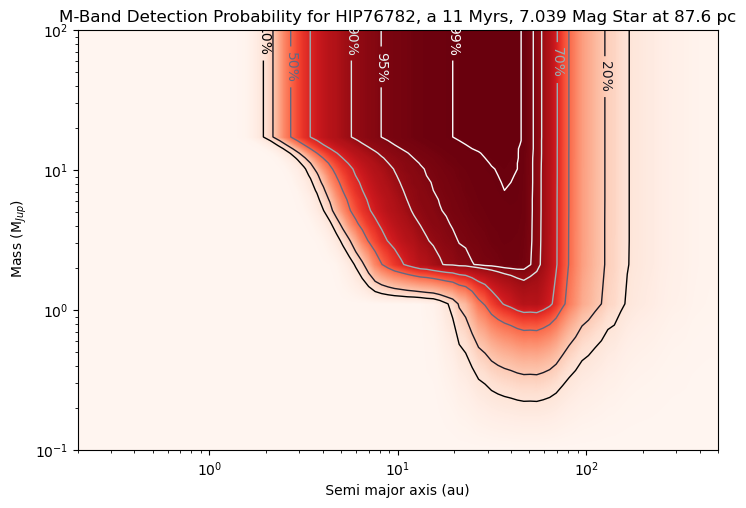

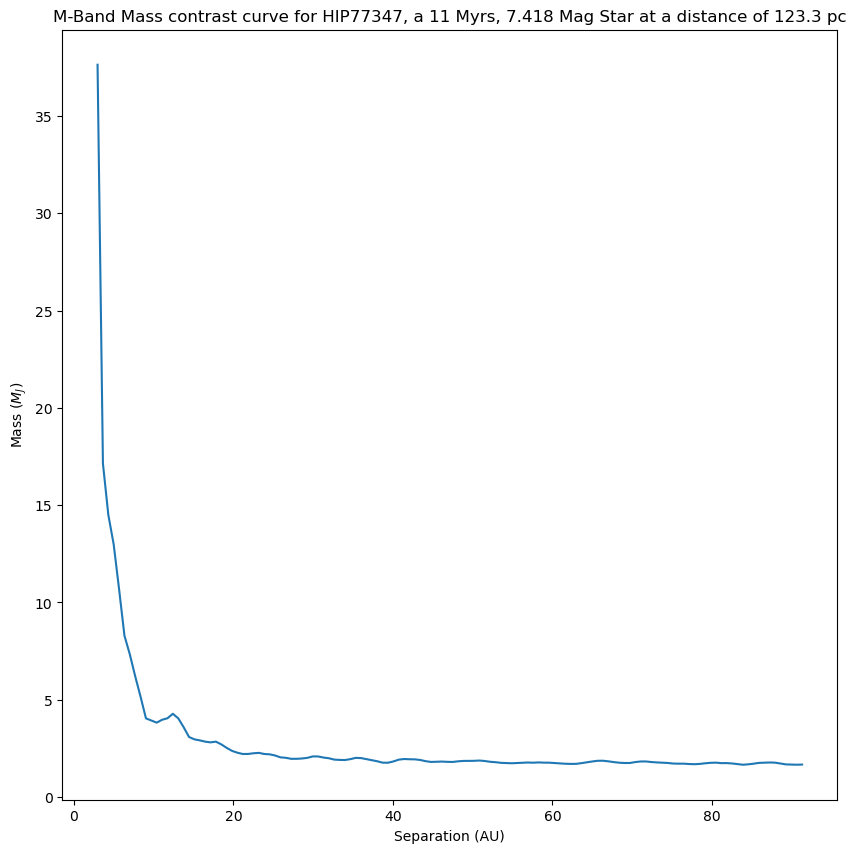

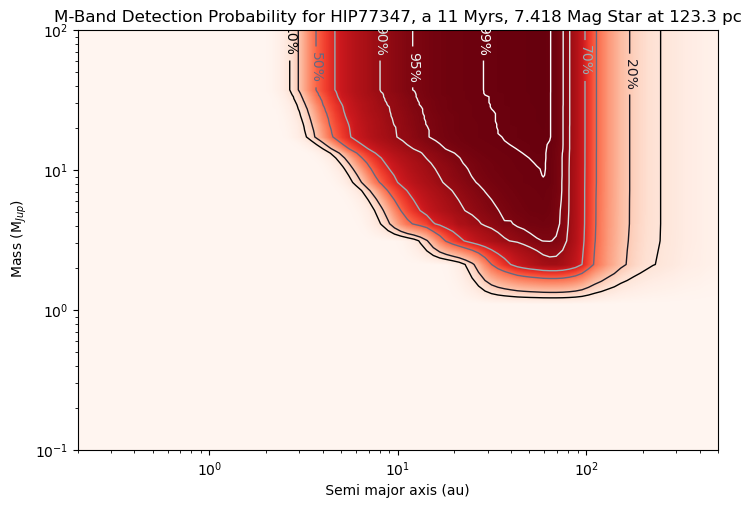

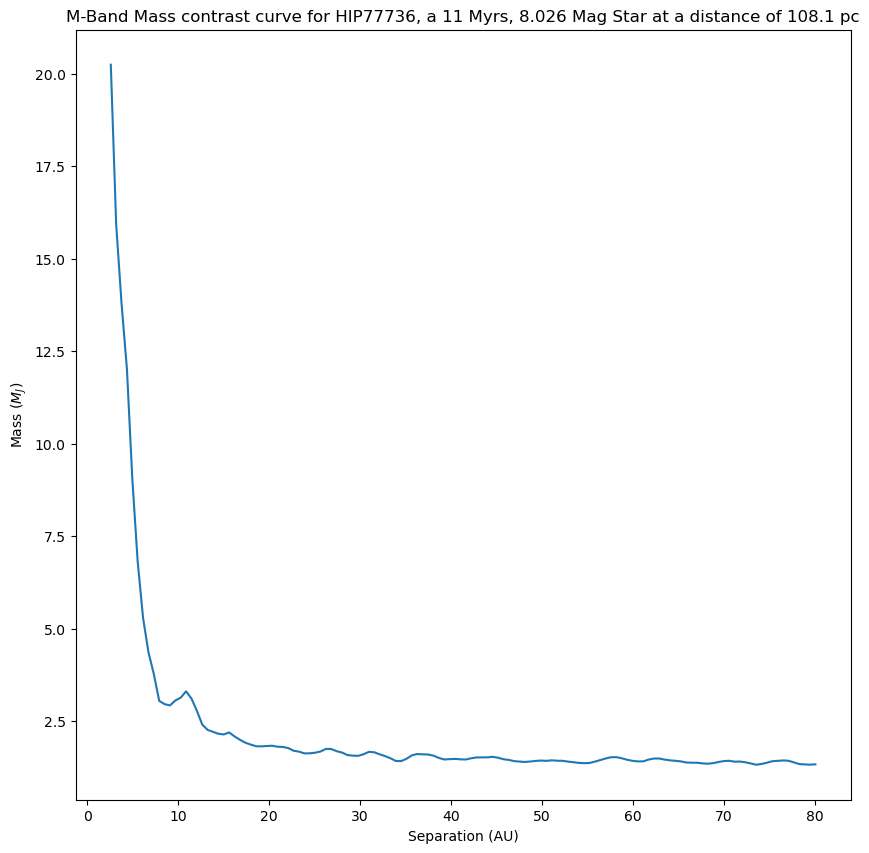

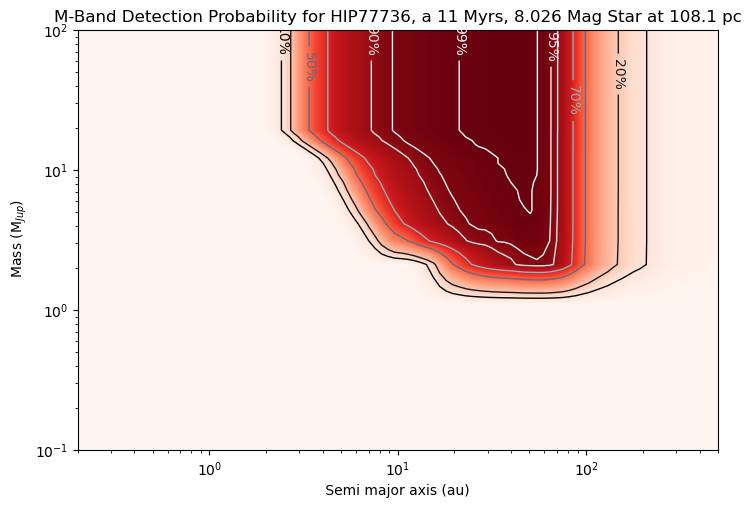

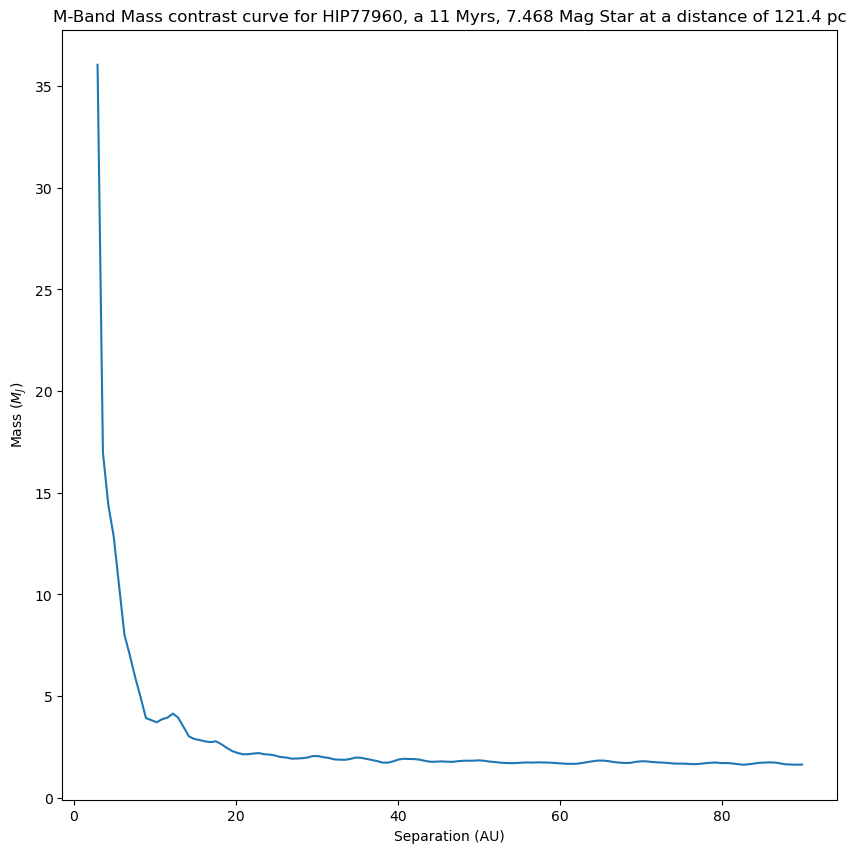

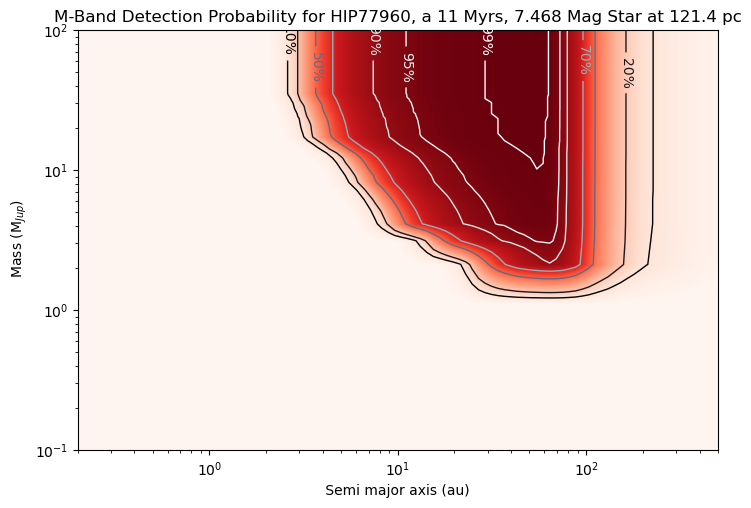

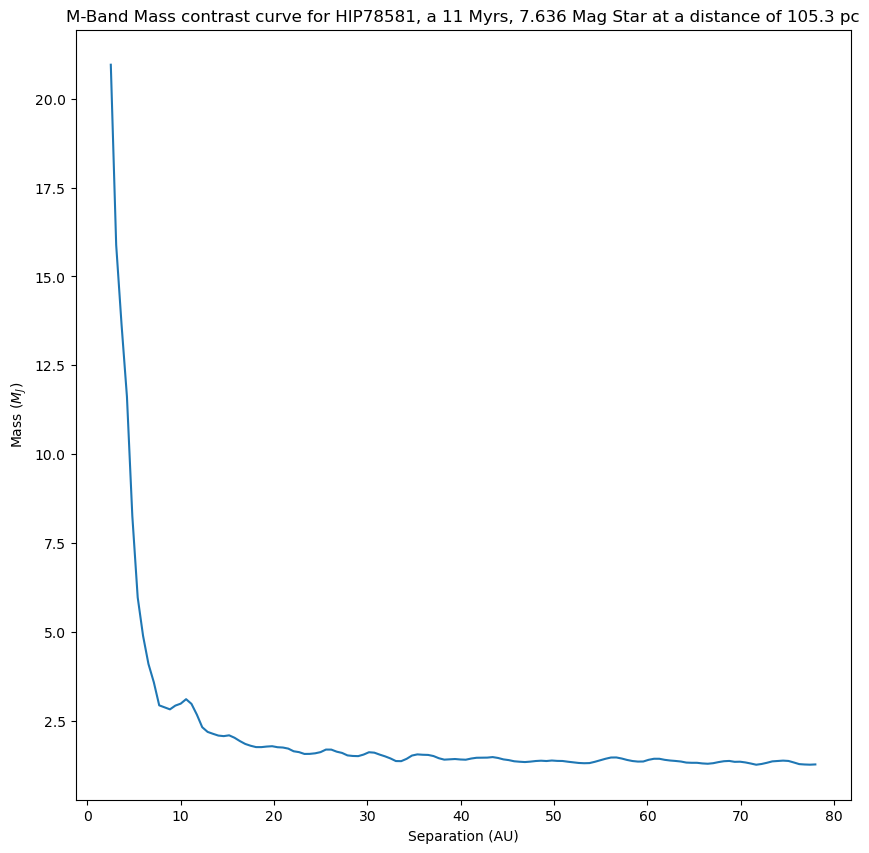

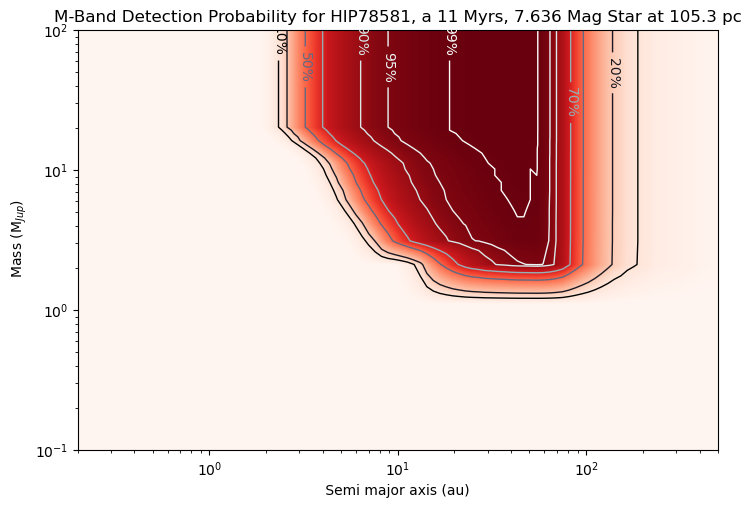

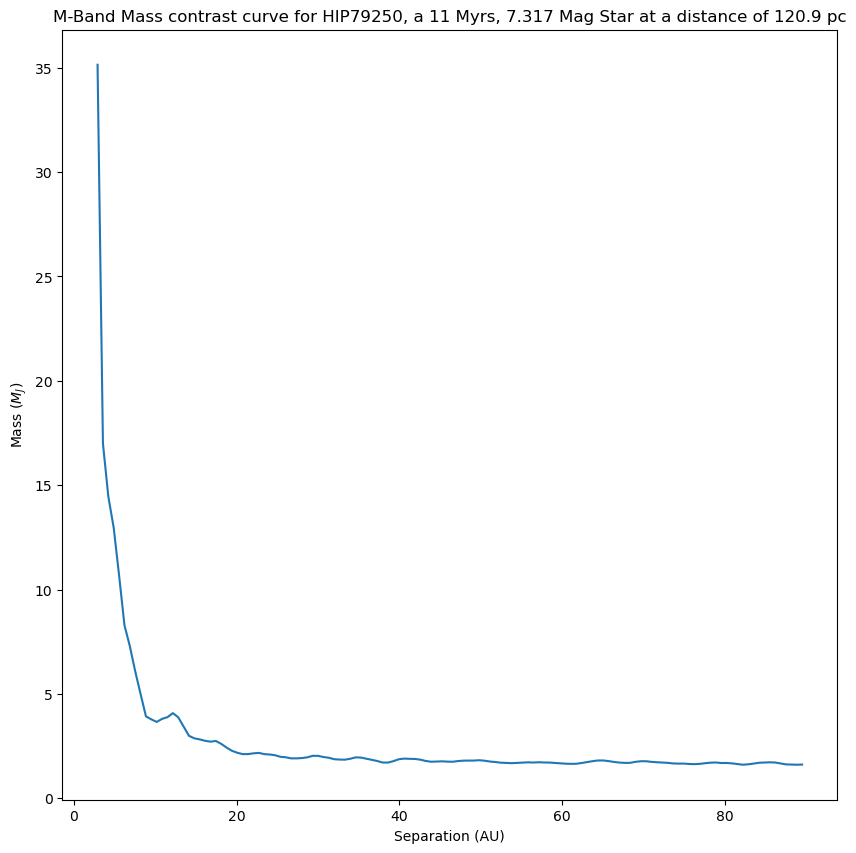

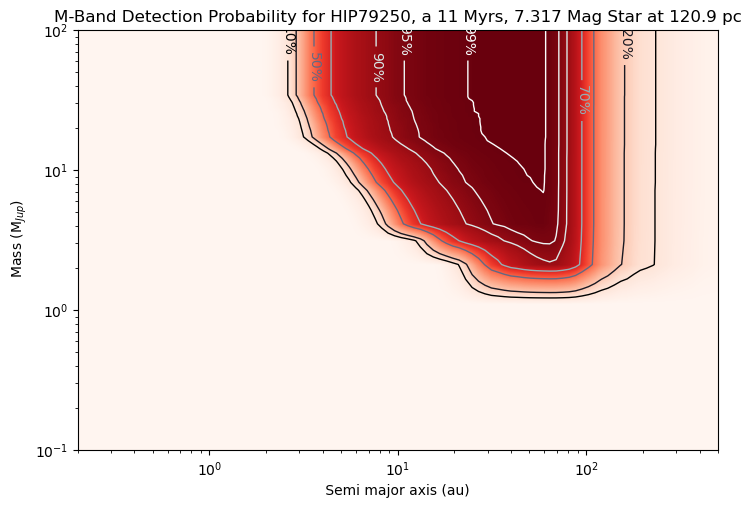

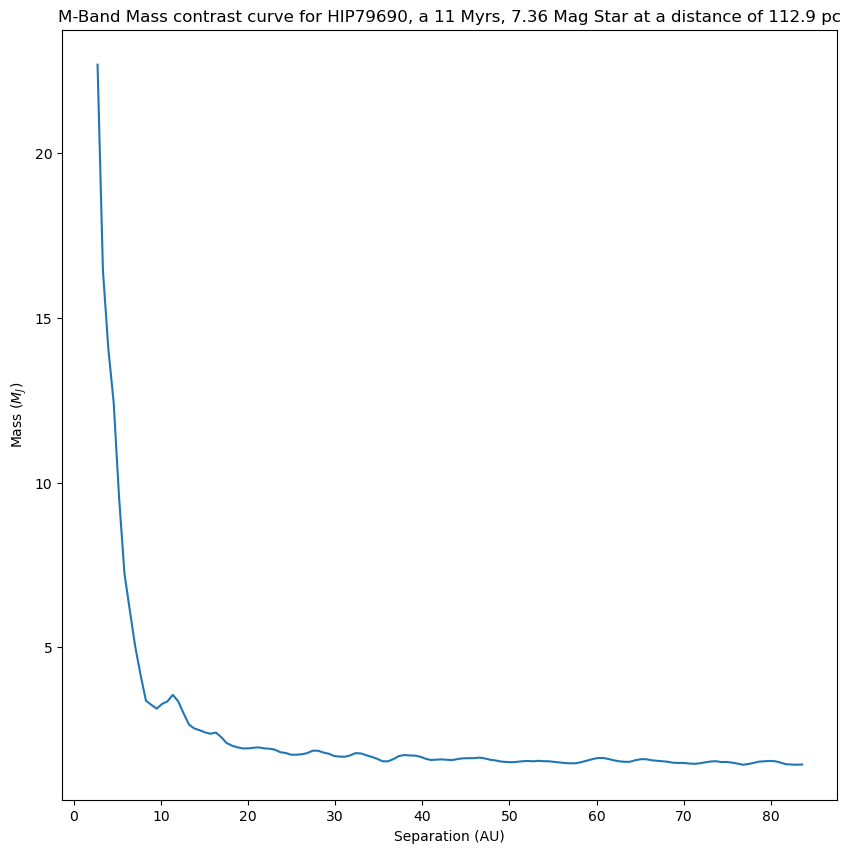

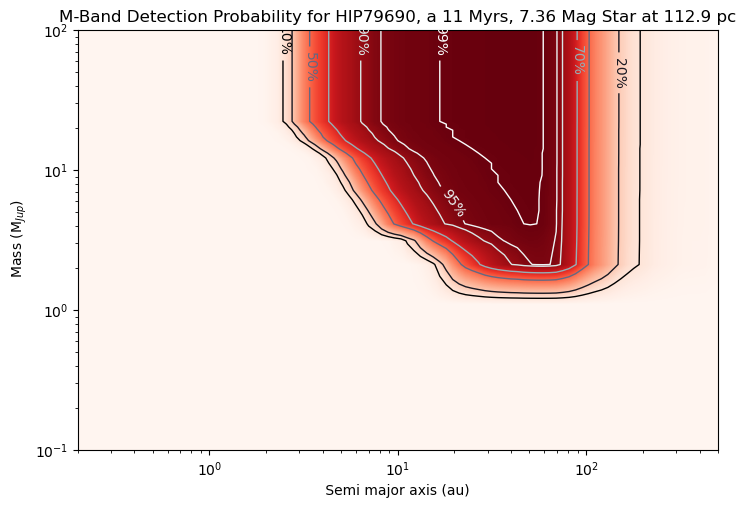

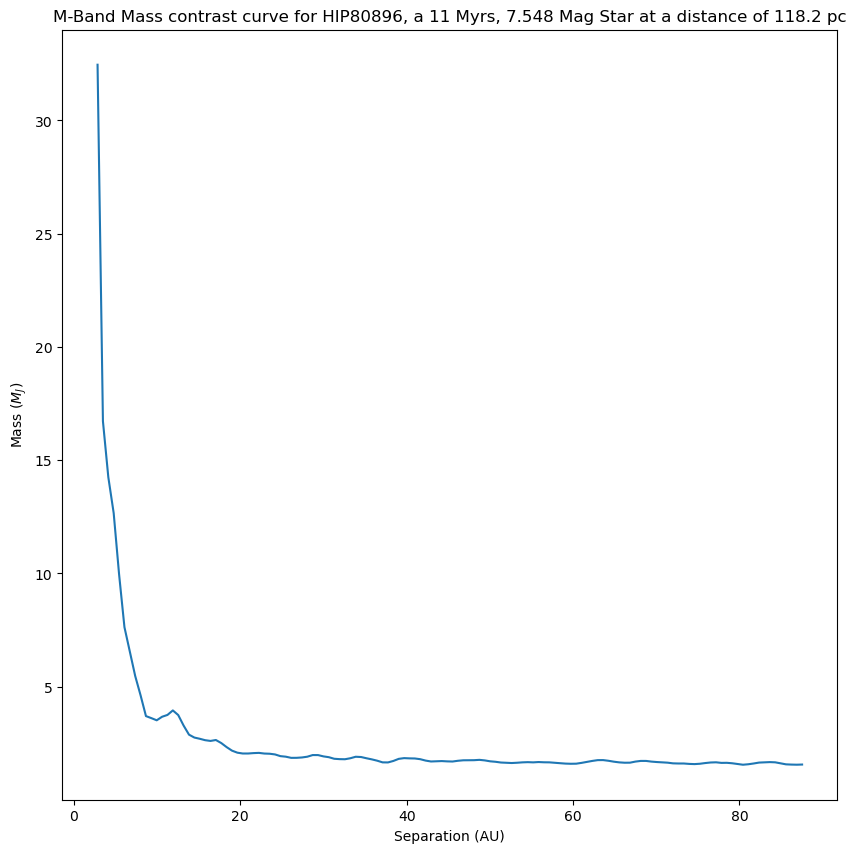

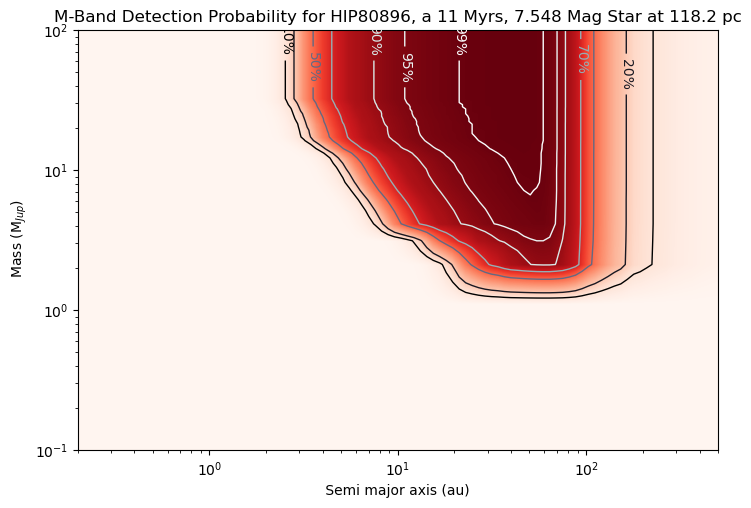

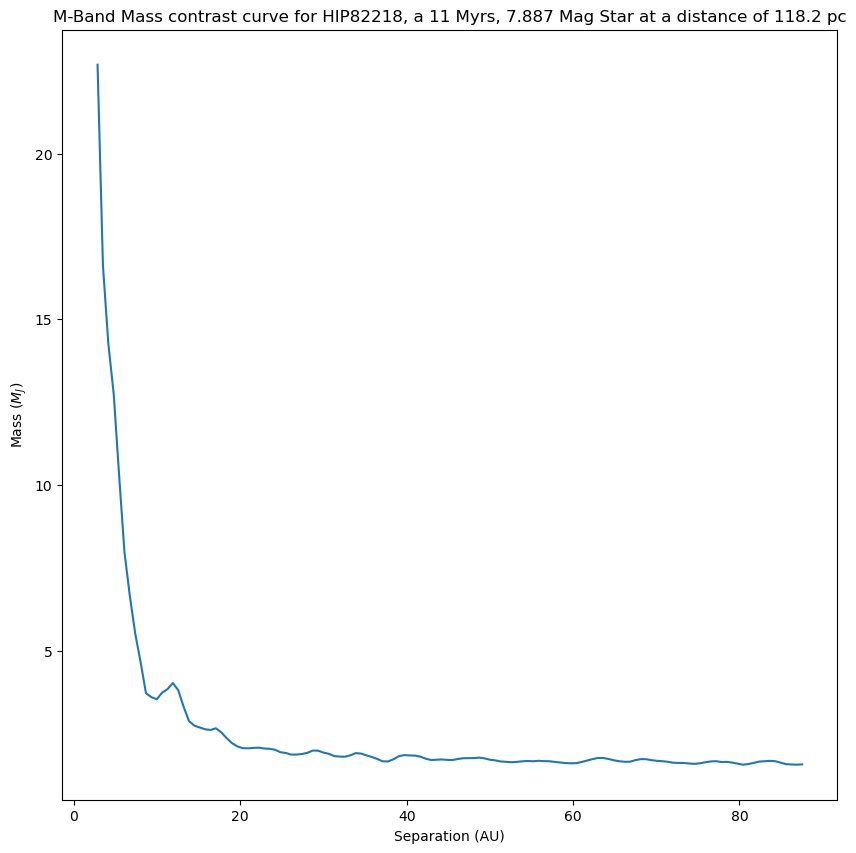

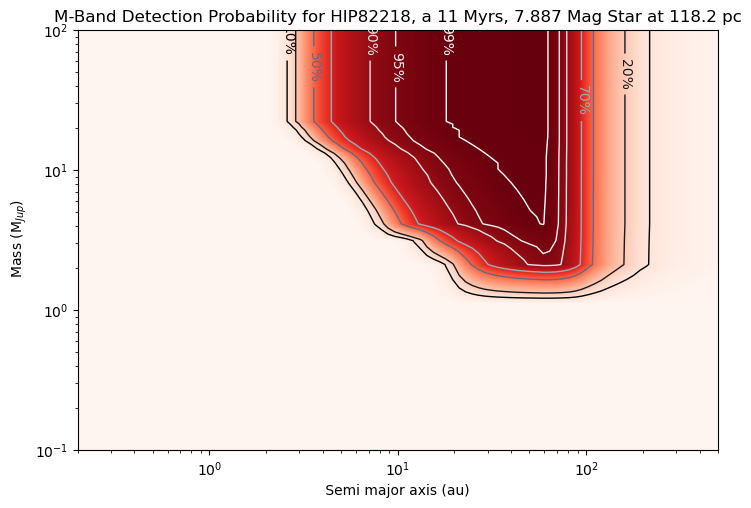

In [8]:
det.plot(model, model_tag, foldername, file_list, file_mag_list, distance, age, stellar_mag_list, filter_name_list, band_list, savefolder, star_list = star_list, xmin = 0.2, xmax = 500, logx = True)

In [47]:
d = 0
e = 0
star_list2 = ['HIP55334',
             'HIP57950',
             'HIP58167',
             'HIP58220',
             'HIP58528',
             'HIP58899',
             'HIP59481',
             'HIP59505',
             'HIP60348',
             'HIP62171',
             'HIP62431',
             'HIP63041',
             'HIP63886',
             'HIP64184',
             'HIP64877',
             'HIP64995',
             'HIP67497',
             'HIP73990',
             'HIP74499',
             'HIP74865',
             'HIP75480',
             'HIP76084',
             'HIP76875',
             'HIP79516',
             'HIP79742',]
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/USC/L_band_old/{}_MKO_Lp_band_detprob.txt'.format(i)))
    e += np.array(np.genfromtxt('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/USC/M_band_old/{}_MKO_Mp_band_detprob.txt'.format(i)))
mop = e/len(star_list)
#for i in star_list2:
    #d += np.array(np.genfromtxt('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/UCL-LCC/M_band_old/{}_MKO_Mp_band_detprob.txt'.format(i)))
map = d/len(star_list)
map = (mop - map)
for i in range(len(map[0,:])):
    for l in range(len(map[:,0])):
        if map[l,i] <= 0:
            map[l,i] = -map[l,i]
print(map)

[[-0.     -0.     -0.     ... -0.     -0.     -0.    ]
 [-0.     -0.     -0.     ... -0.     -0.     -0.    ]
 [-0.     -0.     -0.     ... -0.     -0.     -0.    ]
 ...
 [-0.      0.0051  0.0002 ...  0.0012  0.0012  0.0012]
 [-0.      0.0046  0.0009 ...  0.0002  0.0002  0.0002]
 [-0.      0.0039  0.0005 ...  0.0002  0.0002  0.0002]]


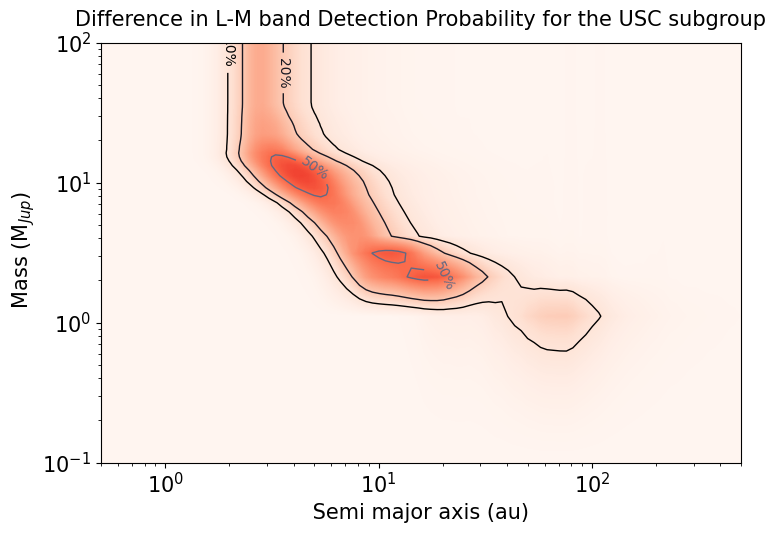

In [48]:
savefilename = 'average_USC_L-M'
savefolder = 'C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/Average_big'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.5, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,20,50,70,90,95,99,100]
norm = mcolors.Normalize(0, 100)
cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, cmap='bone', zorder=1, linewidths=1)
locations = [(1,60),(4,25),(4,14)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=10)
ax.set_title('Difference in L-M band Detection Probability for the USC subgroup', size = 15, y= 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

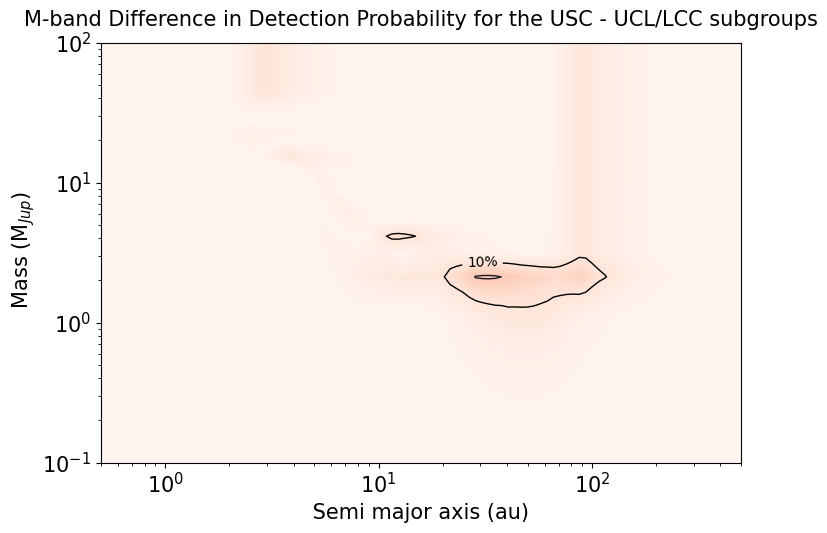

In [33]:
savefilename = 'average_USC-UCL_LCC_M'
savefolder = 'C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/Average_big'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.5, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,20,50,70,90,95,99,100]
norm = mcolors.Normalize(0, 100)
cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, cmap='bone', zorder=1, linewidths=1)
locations = [(1,60),(4,25),(4,14)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=10)
ax.set_title('M-band Difference in Detection Probability for the USC - UCL/LCC subgroups', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

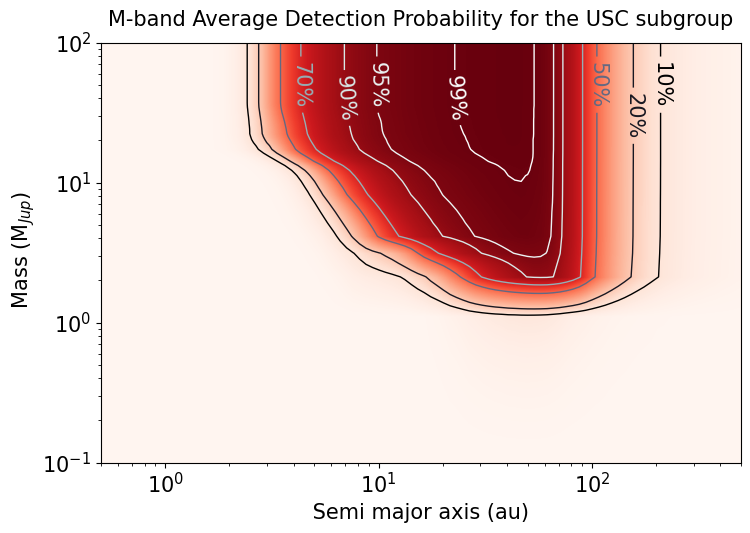

In [9]:
d = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/USC/M_band_old/{}_MKO_Mp_band_detprob.txt'.format(i)))
map = d/len(star_list)

savefilename = 'average_USC_MKO_Mp_band'
savefolder = 'C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/Average_big'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.5, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,20,50,70,90,95,99,100]
norm = mcolors.Normalize(0, 100)
cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, cmap='bone', zorder=1, linewidths=1)
locations = [(200,50),(150,30),(100,50),(4,50),(6,40),(9,50),(20,40)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)
ax.set_title('M-band Average Detection Probability for the USC subgroup', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

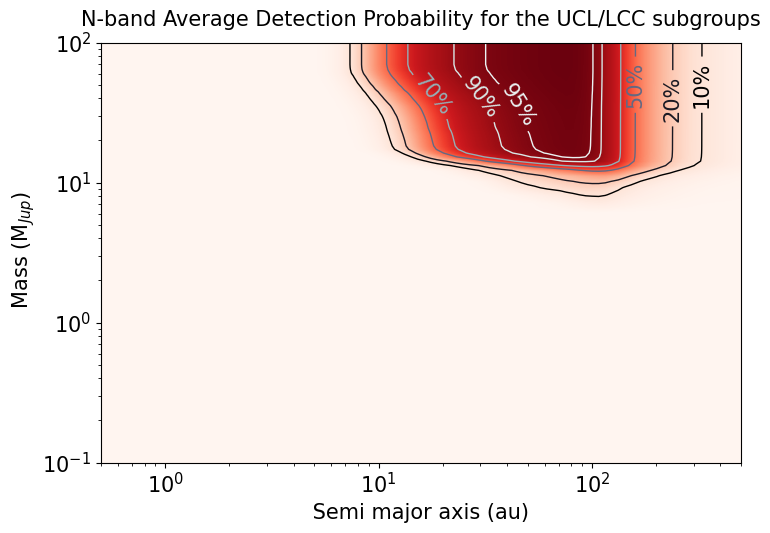

In [44]:
d = 0
for i in star_list2:
    d += np.array(np.genfromtxt('C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Preliminary/UCL-LCC/N_band/KECK/{}_N_band_detprob.txt'.format(i)))
map = d/len(star_list2)

savefilename = 'average_UCL_LCC_MKO_N_band'
savefolder = 'C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/plots/Interpolated/Average_big'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.5, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,20,50,70,90,95,99,100]
norm = mcolors.Normalize(0, 100)
cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, cmap='bone', zorder=1, linewidths=1)
locations = [(300,50),(200,40),(150,50),(20,50),(30,40),(50,40)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)
ax.set_title('N-band Average Detection Probability for the UCL/LCC subgroups', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')